# importing all the libraries

In [1]:
import requests
from zipfile import ZipFile
import os
import shutil
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
from sklearn.decomposition import PCA

# Downloading all the data using request

In [ ]:
try:
    os.mkdir(r'data')
    os.mkdir(r'accident_all_years')
except:
    pass
for year_all in range(1975,2025,5):
    url_download = r'https://static.nhtsa.gov/nhtsa/downloads/FARS/'+str(year_all)+'/National/'+'FARS'+str(year_all)+'NationalCSV.zip'
    r = requests.get(url_download)
    output_file = str(year_all)+'.zip'
    with open(output_file, 'wb') as f:
        f.write(r.content)
    zip_file = ZipFile(str(year_all)+'.zip')
    if not os.path.exists('data/'+str(year_all)):
        os.mkdir('data/'+str(year_all))
    zip_file.extractall('data/'+str(year_all))
    shutil.copy('data/'+str(year_all)+'/ACCIDENT.CSV', 'accident_all_years/'+str(year_all)+'_accident.csv')

In [ ]:
dataset_all=[]
for i in glob('accident_all_years/*.csv'):
    data=pd.read_csv(i,encoding='unicode_escape')
    dataset_all.append(data)
all_data=pd.concat(dataset_all)

# Printing all the fatal rates

In [ ]:
print("percentage of fatal accidents is :",round(len(all_data[all_data['FATALS']>=1])/len(all_data)*100,6))
print("Total number of fatal accidents are: ",len(all_data[all_data['FATALS']>=1]))
print("Total number of people involved are : ",sum(all_data.loc[all_data['PERSONS'],'PERSONS']))
print("Proportion of accidents occurred between 9pm and 4am is:",(len(all_data.loc[all_data.HOUR>=21,:])+len(all_data.loc[all_data.HOUR<=4,:]))/len(all_data))
print("Proportion of accident when weather was snowy are: ",len(all_data.loc[all_data['WEATHER']==4,:])/len(all_data))

#  Ploting data

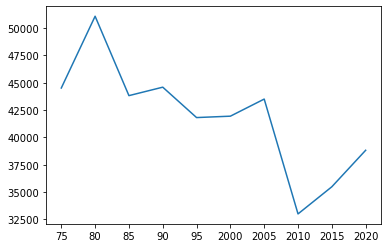

In [7]:
all_data_year=all_data.groupby('YEAR')['FATALS'].sum().reset_index()
all_data_year=all_data_year[all_data_year.YEAR!=99]
plt.plot(all_data_year['YEAR'].apply(lambda x:str(x)),all_data_year['FATALS'])  # Plot the chart
plt.show() 

In [8]:
len(all_data[(all_data['FATALS']>=1)&(all_data['DRUNK_DR']==1)])
subset_all=all_data[all_data.DRUNK_DR>=1 & (all_data.YEAR==75) ]
print('By 1975, top states are:')
print(subset_all.groupby('STATE')['FATALS'].sum().sort_values())

By 1975, top states are:
STATE
11      412
44      773
2       799
50      839
38      972
10     1161
15     1222
33     1397
56     1496
46     1528
23     1760
30     2185
16     2331
31     2487
49     2759
32     2979
9      3366
54     3449
35     4099
20     4160
19     4205
25     4730
41     4752
27     5225
5      5496
8      5685
24     5799
53     6329
40     6614
55     6868
28     6937
34     7321
21     7536
51     8312
18     8454
22     8456
45     8799
4      8831
1      8865
29     9528
47    10866
26    12397
17    13028
39    13039
37    13165
13    13835
42    13993
36    14939
12    27039
48    32333
6     39574
Name: FATALS, dtype: int64


In [9]:
print('By 1990, top states are:')
subset_all=all_data[(all_data.DRUNK_DR>=1) & (all_data.YEAR==90) ]
print(subset_all.groupby('STATE')['FATALS'].sum().sort_values())
columns=['STATE', 'MONTH', 'DAY', 'YEAR', 'HOUR', 'PERSONS', 'MAN_COLL', 'LGT_COND', 'WEATHER', 'SCH_BUS', 'FATALS',
'DAY_WEEK', 'DRUNK_DR']
subset=all_data[columns]
subset=subset.dropna()
subset=subset[0:5000]
normalized_arr = preprocessing.normalize(subset)
distamces=euclidean_distances(normalized_arr,normalized_arr)
random_rows=pd.DataFrame(distamces)
random_rows.sort_values(by=0).loc[:,0]
random_rows.sort_values(by=1).loc[:,1]
X=all_data_year
pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)

By 1990, top states are:
STATE
11      21
2       42
44      45
50      48
38      52
33      60
49      66
56      70
10      70
46      71
15      80
23      91
16      93
31      98
30     119
32     159
9      168
28     172
20     173
19     201
54     208
27     228
25     231
24     231
8      232
41     238
40     245
35     252
34     277
4      313
55     336
21     337
45     348
29     420
22     425
18     425
5      426
1      432
53     457
51     475
39     491
47     529
13     606
37     616
17     635
36     660
42     692
26     698
12    1230
48    1450
6     2237
Name: FATALS, dtype: int64
[0.98026298 0.01973702]
